In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

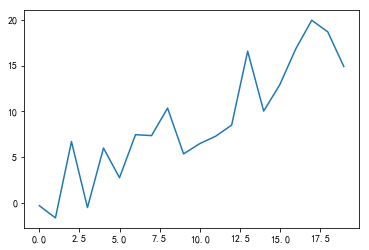

In [2]:
train_X = np.arange(20)
train_Y = train_X+(np.random.rand(20)-0.5)*10
n_samples = train_X.shape[0]
plt.plot(train_X,train_Y)

In [3]:
# Parameters
learning_rate = 0.1
training_epochs = 1000
display_step = 50

In [4]:
# Graph input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# Set model weights
W = tf.Variable(rng.randn(),name = 'weights')
b = tf.Variable(rng.randn(),name = 'bias')

In [5]:
def net(x,W,b):
    return tf.add(tf.multiply(x,W),b)
pred = net(X,W,b)
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

epoch:0050 traing_cost =  7.978759766 W= 0.6349508 b= 0.55117995
epoch:0100 traing_cost =  7.743182182 W= 0.61047494 b= 1.0282029
epoch:0150 traing_cost =  7.680642128 W= 0.6020659 b= 1.1920906
epoch:0200 traing_cost =  7.661329746 W= 0.5991768 b= 1.2483962
epoch:0250 traing_cost =  7.654942513 W= 0.59818447 b= 1.2677408
epoch:0300 traing_cost =  7.652786255 W= 0.59784335 b= 1.2743866
epoch:0350 traing_cost =  7.652044773 W= 0.5977263 b= 1.2766699
epoch:0400 traing_cost =  7.651789665 W= 0.59768605 b= 1.2774544
epoch:0450 traing_cost =  7.651704311 W= 0.5976721 b= 1.2777253
epoch:0500 traing_cost =  7.651679993 W= 0.5976673 b= 1.2778156
epoch:0550 traing_cost =  7.651663780 W= 0.5976655 b= 1.2778529
epoch:0600 traing_cost =  7.651663780 W= 0.5976648 b= 1.2778647
epoch:0650 traing_cost =  7.651666164 W= 0.59766465 b= 1.2778652
epoch:0700 traing_cost =  7.651666164 W= 0.59766465 b= 1.2778652
epoch:0750 traing_cost =  7.651666164 W= 0.59766465 b= 1.2778652
epoch:0800 traing_cost =  7.6516

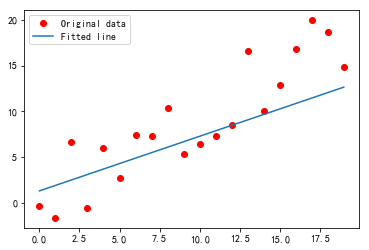

In [6]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
        if (epoch+1)%display_step == 0:
            c = sess.run(cost, feed_dict = {X:train_X, Y:train_Y })
            print('epoch:%04d' %(epoch+1),'traing_cost = ', "{:.9f}".format(c), \
                  "W=", sess.run(W), "b=", sess.run(b))
    traing_cost = sess.run(cost, feed_dict = {X:train_X, Y:train_Y })
    print('traing_cost = ',traing_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X,sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()